In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
import os
from tqdm import tqdm

In [3]:
from fastai.vision import *

In [4]:
PATH = Path('../data/')

In [5]:
! ls {PATH}/valid

cats  dogs


In [6]:
size = 128
bs = 128
data = ImageDataBunch.from_folder(PATH, size=size, bs=bs)

In [7]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


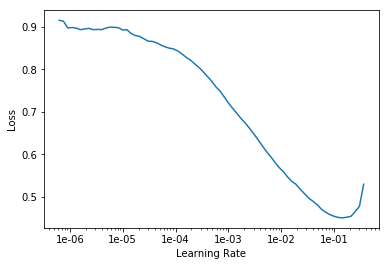

In [9]:
learn.recorder.plot()

In [10]:
lr = 0.01
learn.fit(2, lr)

epoch,train_loss,valid_loss,accuracy
1,0.125587,0.139149,0.947500
2,0.103401,0.093497,0.963000


In [11]:
learn.unfreeze()

In [12]:
lr = 0.0001
learn.fit(2, lr)

epoch,train_loss,valid_loss,accuracy
1,0.068125,0.074396,0.970000
2,0.027293,0.097485,0.972000


In [13]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(data, preds, y, losses)

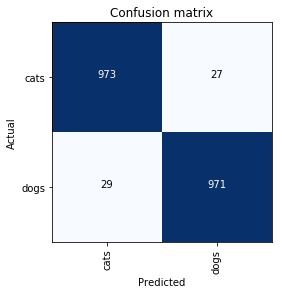

In [14]:
interp.plot_confusion_matrix()

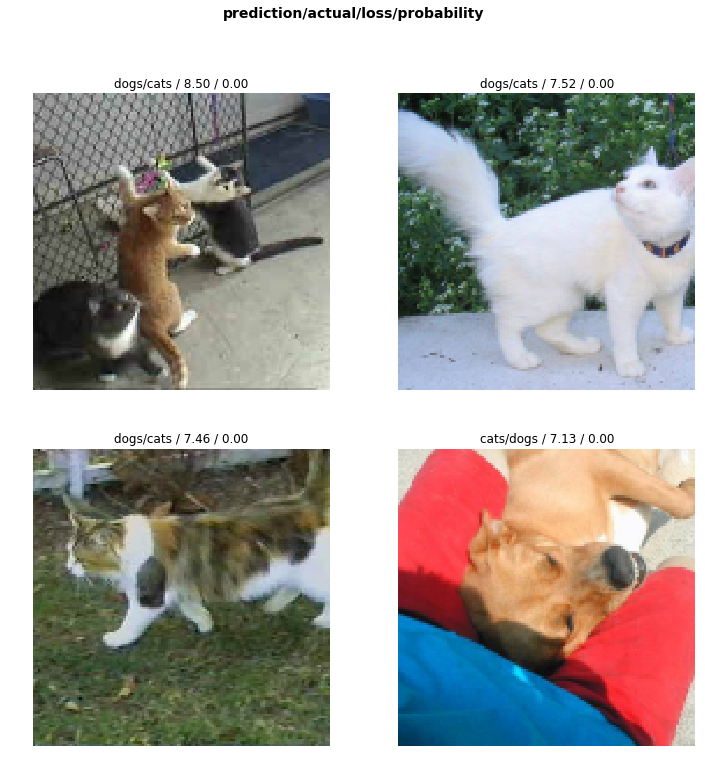

In [17]:
interp.plot_top_losses(k=4)